In [237]:
# Practice test
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [239]:
# load a data set
df = pd.read_csv('companies.csv')
df


,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k
...,...,...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",NaN,72,454,2,26,21
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",NaN,72,799,15,9,13
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",NaN,72,489,3,11,8
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",NaN,72,520,4,1,10


In [240]:
df = df.drop('Highly_rated_for', axis=1)
df = df.drop('Critically_rated_for', axis=1)
df

,Company_name,Description,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,34k,414.4k,2.8k,719,4k
...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,72,454,2,26,21
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,72,799,15,9,13
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,72,489,3,11,8
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,72,520,4,1,10


In [243]:
df.isnull().sum()

Company_name            0
Description             0
Ratings                 0
Total_reviews           0
Avg_salary              0
Interviews_taken        0
Total_jobs_available    0
Total_benefits          0
dtype: int64

In [245]:
df = pd.read_csv('companies.csv')
df
def replace_k(value):
    if isinstance(value, str) and value.endswith('k'):
        return int(float(value[:-1]) * 1000)
    return value

# Apply the function to relevant columns
columns_to_fix = ['Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_benefits']
for col in columns_to_fix:
    df[col] = df[col].apply(replace_k)
df

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100,856900,6100,847,11500
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46400,584600,4300,9.9k,7100
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700,561500,3600,460,5800
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200,427400,3700,405,5000
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000,414400,2800,719,4000
...,...,...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",NaN,72,454,2,26,21
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",NaN,72,799,15,9,13
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",NaN,72,489,3,11,8
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",NaN,72,520,4,1,10


In [246]:
df = df.drop('Highly_rated_for', axis=1)
df = df.drop('Critically_rated_for', axis=1)
df

,Company_name,Description,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,73100,856900,6100,847,11500
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,46400,584600,4300,9.9k,7100
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,41700,561500,3600,460,5800
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,39200,427400,3700,405,5000
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,34000,414400,2800,719,4000
...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,72,454,2,26,21
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,72,799,15,9,13
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,72,489,3,11,8
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,72,520,4,1,10


In [257]:
df.info

<bound method DataFrame.info of                        Company_name  \
0                               TCS   
1                         Accenture   
2                         Cognizant   
3                             Wipro   
4                         Capgemini   
...                             ...   
9995        Techila Global Services   
9996            RxLogix Corporation   
9997  Avians Innovations Technology   
9998                   ACPL Systems   
9999                      Beroe Inc   

                                            Description  Ratings  \
0     IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
1     IT Services & Consulting | 1 Lakh+ Employees |...      4.0   
2     IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
3     IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
4     IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
...                                                 ...      ...   
9995  IT Services & Con

In [259]:
df.isnull().sum()

Company_name            0
Description             0
Ratings                 0
Total_reviews           0
Avg_salary              0
Interviews_taken        0
Total_jobs_available    0
Total_benefits          0
dtype: int64

In [248]:
# visualization

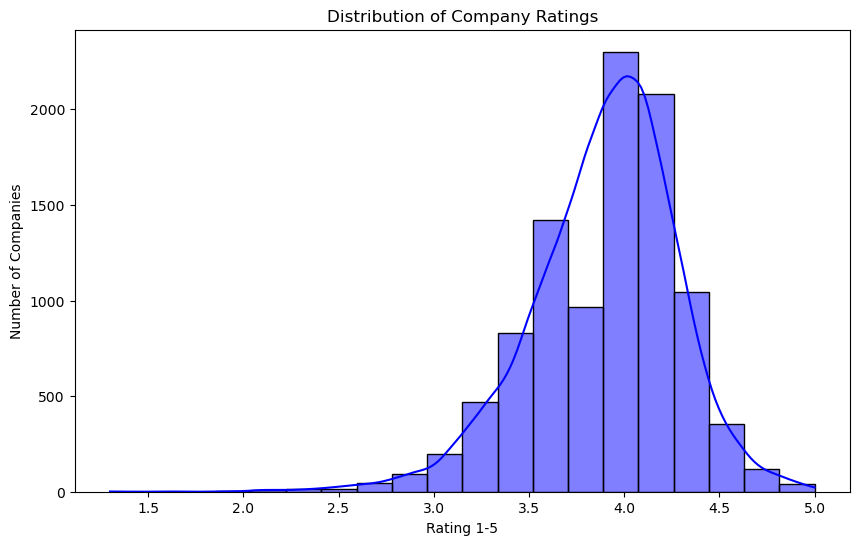

In [251]:
# rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=20, kde=True, color='blue')
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating 1-5')
plt.ylabel('Number of Companies')
plt.show()

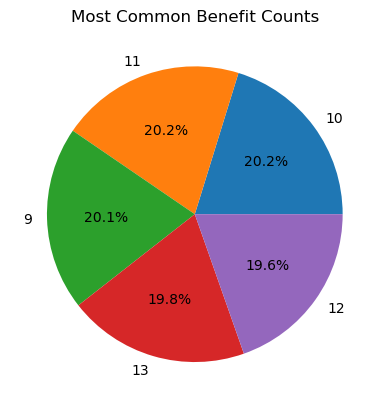

In [267]:
df['Total_benefits'].value_counts().head(5).plot.pie(autopct='%1.1f%%')
plt.title('Most Common Benefit Counts')
plt.ylabel('')
plt.show()